<a href="https://colab.research.google.com/github/sergioarnold87/Caso_Practico_Relaciones_P-blicas/blob/main/Departamento_de_Relaciones_P%C3%BAblicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Análisis del Sentimiento de los Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1nCRtae4P_PA29o7_ZZxT4KZ_Dwn9pVto)

![alt text](https://drive.google.com/uc?id=1KWse1Fc_seaqEfgnKMTdFRM1Xmo_ZFzb)

# TAREA # 2: IMPORTAR LIBRERÍAS Y DATA SETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta en: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
reviews_df = pd.read_csv("/content/drive/MyDrive/Caso_Practico Relaciones_Públicas/amazon_alexa.tsv", sep = "\t")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# TAREA #3: EXPLORAR EL DATASET

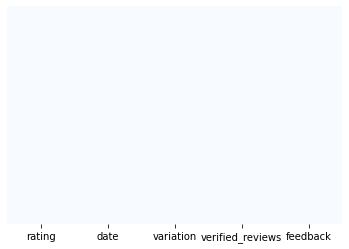

In [9]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar = False, cmap= "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f500805db10>,
      dtype=object)

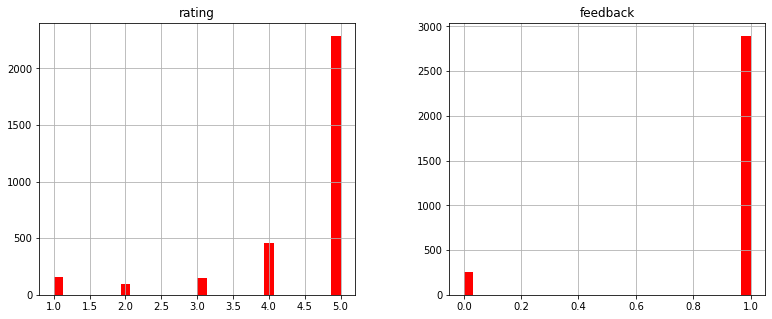

In [10]:
reviews_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [11]:
reviews_df['length'] = reviews_df["verified_reviews"].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


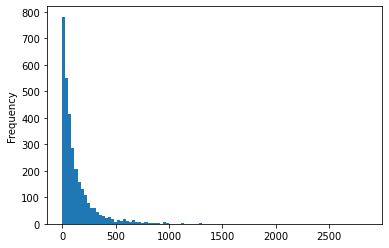

In [12]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [13]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [15]:
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [16]:
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [17]:
positive = reviews_df[reviews_df['feedback'] == 1]

In [18]:
negative = reviews_df[reviews_df['feedback'] == 0]

In [19]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [20]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


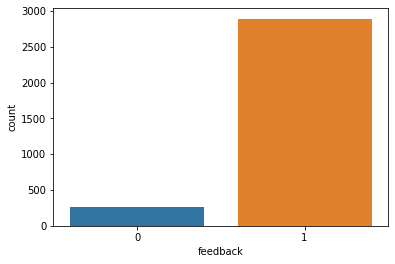

In [21]:
sns.countplot(reviews_df['feedback'], label = "count")

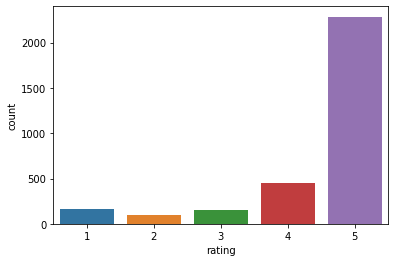

In [22]:
sns.countplot( x = 'rating', data = reviews_df)

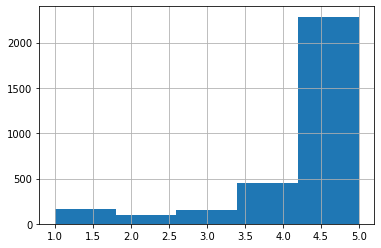

In [23]:
reviews_df['rating'].hist(bins = 5)

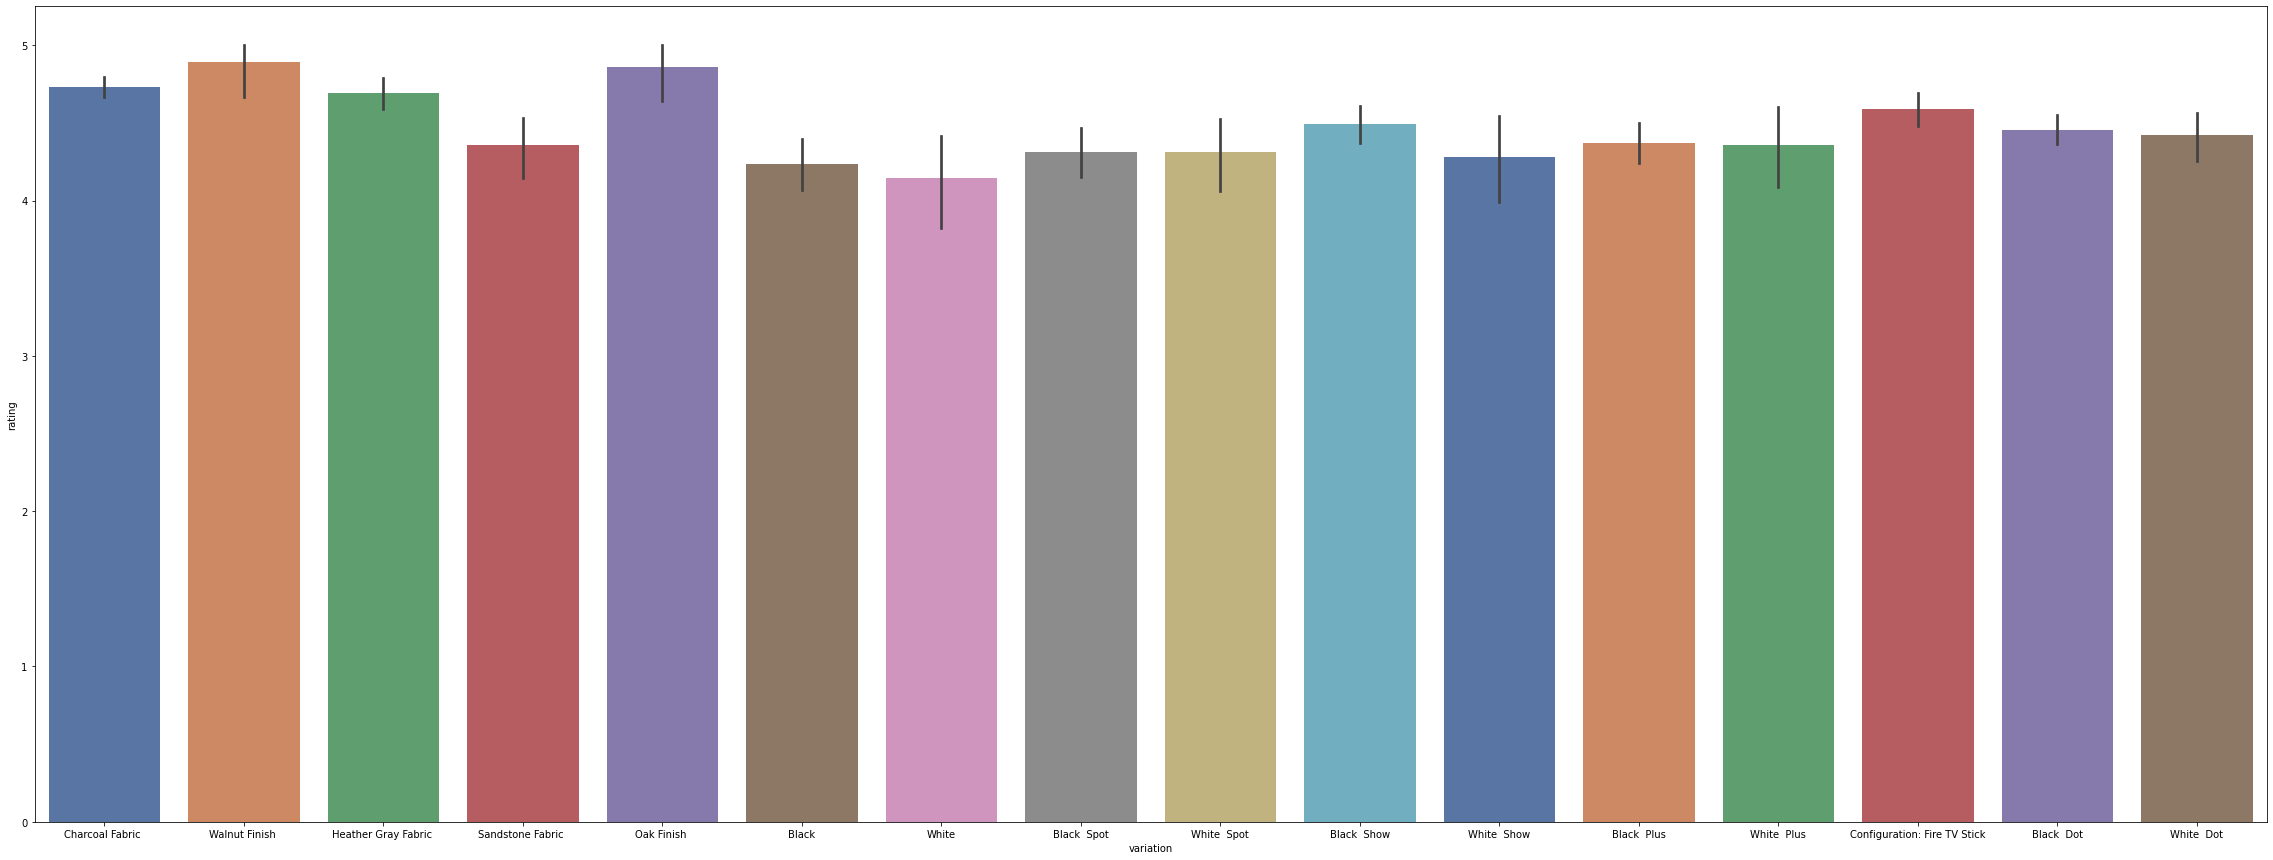

In [27]:
plt.figure(figsize=(40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep' )

In [28]:
  sentences = reviews_df['verified_reviews'].tolist()
  len(sentences)

3150

In [23]:
print(sentences)

In [23]:
sentences_as_one_string = " ".join(sentences)

In [23]:
sentences_as_on_string

# TAREA #4: LLEVAR A CABO LA LIMPIEZA DE DATOS

# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

# TAREA 6: ENTENDER COMO LIAR LAS STOPWORDS

# TAREA 7: ENTENDER EL PROCESO DE TOKENIZACIÓN

![alt text](https://drive.google.com/uc?id=10dlXiQMdvzLJwNqhnvylAix9_LUQCGQa)

# TAREA #8: LLEVAR A CABO LA LIMPIEZA DE DATOS APLICANDO TODO LO QUE HEMOS APRENDIDO!!

In [24]:
# Definimos un pipeline para limpiar todos los mensajes
# El pipeline realizamos lo siguiente: (1) eliminar signos de putuación, (2) eliminar las stopwords


In [25]:
# Probemos la función que acabamos de crear

# TAREA #9: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE NAÏVE BAYES

![alt text](https://drive.google.com/uc?id=1AyMGr5pZWQ3frRD_84NAM1k765dZNm0S)

![alt text](https://drive.google.com/uc?id=1lLQR8v2Iu8-uXzC7sgNdzVAXjtAkvh2z)

![alt text](https://drive.google.com/uc?id=1KuifCAosRqw0VG0d9itxul4Yjm1LFfHX)

![alt text](https://drive.google.com/uc?id=1XOfRNtgEn6NQcDu-kats3rVMh75hrzZW)

![alt text](https://drive.google.com/uc?id=1JYeNmZFOMDWzzW82ARq851WVhi38pMmp)

![alt text](https://drive.google.com/uc?id=12kQKrWY3pvAWaLazeLSfUrgiQIisd0qX)

![alt text](https://drive.google.com/uc?id=1q3SWsZkfUtxnI6r-uqBZvK8KSnZ_R2qj)

![alt text](https://drive.google.com/uc?id=1swfSHTNQZGOwbPOSc6J775Fe8YDT7A2J)

# TAREA #10: ENTRENAR UN MODELO CLASIFICADOR DE NAÏVE BAYES

# TAREA #11: VALIDAR LA EFICACIA DEL MODELO ENTRENADO

![alt text](https://drive.google.com/uc?id=1ZKbO9tQH3qh0IjKwgOAJ37ghWzUVcb8O)

# TAREA #12: RETO FINAL - ENTRENAR Y EVALUAR UN MODELO CLASIFICADOR BASADO EN LA REGRESIÓN LOGÍSTICA

# UN TRABAJO EXCELENTE! PUEDES SENTIRTE ORGULLOSO DE TODO LO QUE ACABAS DE APRENDER